<img src="images/PCA.png" alt="drawing" width="1000"/>

# **Principal Component Analysis**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

## 1 Import Data

There are 30 features (columns) in the data, which is too many to understand, even if you use a heatmap. 

In [37]:
data = pd.read_csv("data/cancer_tumor_data_features.csv")
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

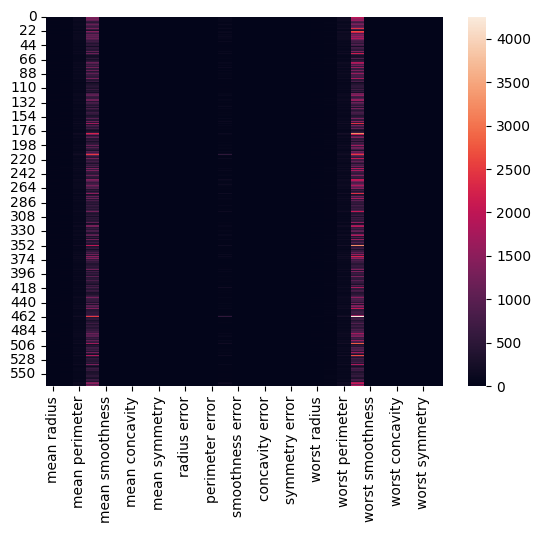

In [38]:
sns.heatmap(data)

Instead of taking a subset of features, the principal components of this feature set are determined in order to form new features which can be analyzed. 

## 2 PCA Manual Implementation 

### 2.1 Scale the Data

It is considered best practice to scale the data first 

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
# X.mean(axis=0)

### 2.2  Get Eigen Mode Data

The next step is to calculate the most important eigen modes of the covariance matrix. These are the eigen vectors with the highest corresponding eigen values. 

In [40]:
C = np.cov(X, rowvar=False)  # Each column in the df is a feature (variable)
eigen_values, eigen_vectors = np.linalg.eig(C)

In [41]:
n_components = 2

sorted_idx_ascending = np.argsort(eigen_values)
sorted_idx_descending = sorted_idx_ascending[::-1]
sorted_idx = sorted_idx_descending[:n_components]
sorted_idx

top_eigen_values = eigen_values[sorted_idx]
top_eigen_vectors = eigen_vectors[sorted_idx]


### 2.3 Project Data onto Eigen Modes 

The original data needs to be projected onto the most import eigenmodes (principal components). The dot product between a vector $\bar X$ and $\bar v$ can be used to project one vector onto the other. 

$$ \bar X \cdot \bar v = ||\bar X|| ||\bar v|| \text{cos}(\theta) $$

In this case the $\bar X$ vector is a vector describing a single data point (row) from the data set. The $\bar v$ vector is an eigenvector, which has been scaled to one by the `np.linalg.eig()` function (which means $||\bar v || = 1.0 $). 

This means that the dot product between a data point $\bar X$ and an eigenvector $\bar v$ is the project distance of $\bar X$ onto $\bar v$, or in other words the component of the data point located on the principal direction described by $\bar v$

In [42]:
principal_coomponents = np.dot(X, eigen_vectors)

### 2.4 Results

From scikit learn we can download the original data set with the true labels for each datapoint (cancerous cells True/False). As only two principal components are chosen, the results can be shown in a scatter plot. There exists a pretty good seperation of variables in the scatterplot below, which means a classification model can be used on these new features. 

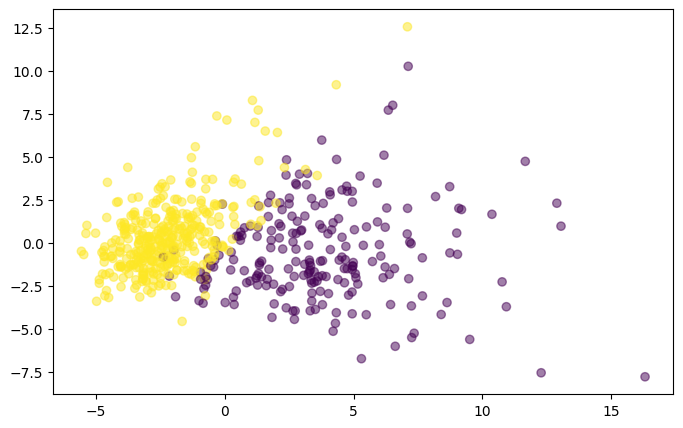

In [46]:
data_object = load_breast_cancer()
y_true = data_object['target']

Z1 = principal_coomponents[:, 0]
Z2 = principal_coomponents[:, 1]

plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(Z1, Z2, alpha=0.5, c=y_true)

## 3 SciKit Learn Implementation

### 3.1 Scale Data

Again, it is good practice to scale your data

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

### 3.2 Get Principal Components

After defining the model you can run `PCA.fit()` to perform the eigenanalysis, and then `PCA.transform()` to perform the vector projection. However the `PCA` class can do both those things with the `PCA.fit_transform()` method. 

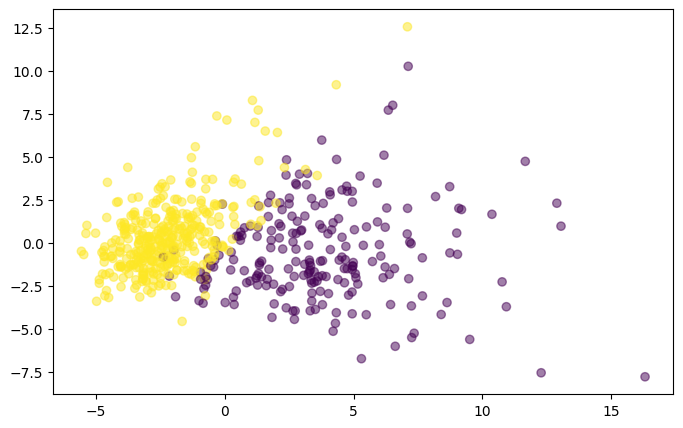

In [52]:
pca = PCA(n_components=2)
Z = pca.fit_transform(X)
Z1, Z2 = np.transpose(Z)

plt.figure(figsize=(8, 5), dpi=100)
plt.scatter(Z1, Z2, alpha=0.5, c=y_true)

### 3.3 Principal Components Model

From the SciKit Learn model some useful information can be obtained. Firstly the **direction** of the components $Z$ in the original feature space $X$ can be shown

<Axes: >

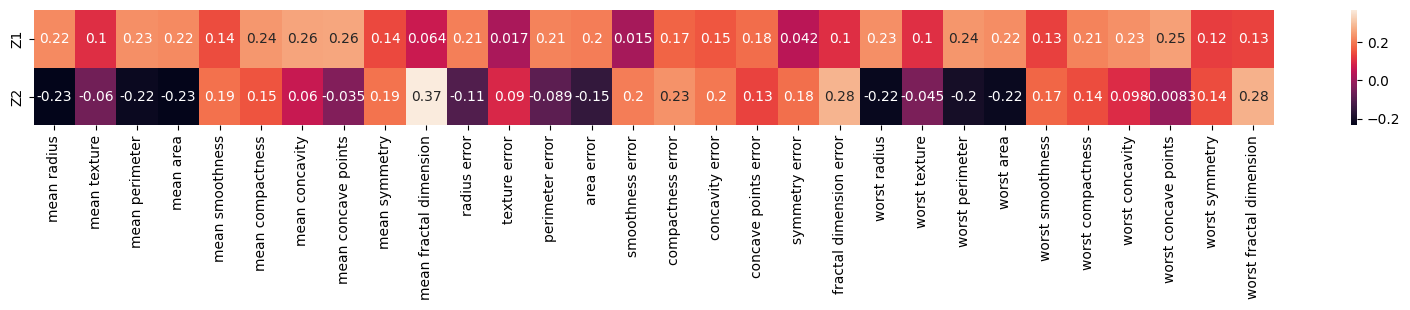

In [59]:
df = pd.DataFrame(pca.components_, index=['Z1', 'Z2'], columns=data.columns)
plt.figure(figsize=(20, 1.5))
sns.heatmap(df, annot=True)

Something that is more useful is the "variance explained" for each components; how much variance does each principal component capture from the original data set. 

In [62]:
var = pca.explained_variance_ratio_

print(f"Principal Component Z1 captures {int(np.round(var[0] * 100))}% of the variance of the orginal data set")
print(f"Principal Component Z2 captures {int(np.round(var[1] * 100))}% of the variance of the orginal data set")
print()
print(f"These components capture a total of {int(np.round(sum(var)*100))}% of the variance of the original data set")

Principal Component Z1 captures 44% of the variance of the orginal data set
Principal Component Z2 captures 19% of the variance of the orginal data set

These components capture a total of 63% of the variance of the original data set


An elbow plot can be constructed in order to determine how many components should be taken into account based on the desired amount of variance. The more components you choose, the more accurate the final model, but this is at the cost of interprability and/or computation time. 

In [66]:
variance = []
n_values = np.arange(1, len(data.columns)+1, 1)

for n in n_values:
    pca = PCA(n_components=n)
    pca.fit(X)
    var = np.sum(pca.explained_variance_ratio_)
    variance.append(var)


Text(0, 0.5, 'Total Variance Explained')

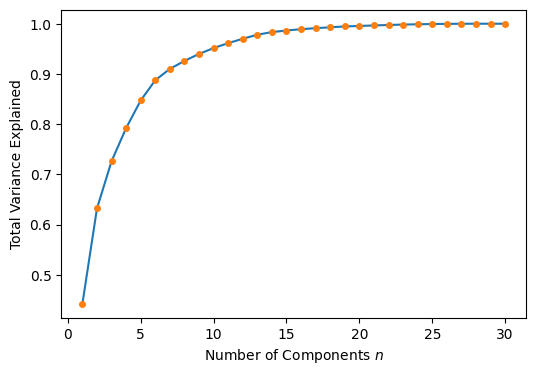

In [79]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(n_values, variance, '-')
plt.plot(n_values, variance, 'o', ms=4)
plt.xlabel('Number of Components $n$')
plt.ylabel('Total Variance Explained')